# **Customer Conversion Prediction**

# Problem Statement

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance

#Features
age (numeric)   
job : type of job   
marital : marital status    
educational_qual : education status   
call_type : contact communication type
day: last contact day of the month (numeric)      
mon: last contact month of year     
dur: last contact duration, in seconds (numeric)    
num_calls: number of contacts performed during this campaign and for this client    
prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")   

**Output variable (desired target)**:   
y - has the client subscribed to the insurance?


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df= pd.read_csv("/content/drive/MyDrive/dataset/customer_convertion.csv")
print(df.shape)
df.head()

(45211, 11)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


#1 Data Jar

## 1.1 data cleaning

### Data Structure

In [100]:
# data is in correct data structure

### Data Type

In [101]:
# Data type
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

### Duplicates

In [102]:
# Duplicates
df = df.drop_duplicates()
df.shape

(45205, 11)

### Outlier

In [103]:
# Age
df.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [104]:
q3 = df.age.quantile(0.75)
q1 = df.age.quantile(0.25)
iqr = q3-q1
max = df.age.max()
min = df.age.min()
up_ther = q3+(1.5*iqr)
low_ther = q1-(1.5*iqr)
print(up_ther, low_ther, max, min)

if up_ther < max:
  print('max value as outlier up_ther :', up_ther, '<', max)
else:
  print('max value as no outlier up_ther :', up_ther, '>', max)
if low_ther > min:
  print('min value as outlier up_ther :', low_ther, '>', min)
else:
  print('min value as no outlier up_ther :', low_ther, '<', min)

70.5 10.5 95 18
max value as outlier up_ther : 70.5 < 95
min value as no outlier up_ther : 10.5 < 18


In [105]:
#### there are some outliers so we are removing it using clipping
df.age = df.age.clip(low_ther, up_ther)
df.age.max() , df.age.min()


(70.5, 18.0)

In [106]:
# Day
df.day.describe()

count    45205.00000
mean        15.80688
std          8.32234
min          1.00000
25%          8.00000
50%         16.00000
75%         21.00000
max         31.00000
Name: day, dtype: float64

In [107]:
q3 = df.day.quantile(0.75)
q1 = df.day.quantile(0.25)
iqr = q3-q1
max = df.day.max()
min = df.day.min()
up_ther = q3+(1.5*iqr)
low_ther = q1-(1.5*iqr)
print(up_ther, low_ther, max, min)

if up_ther < max:
  print('max value as outlier up_ther :', up_ther, '<', max)
else:
  print('max value as no outlier up_ther :', up_ther, '>', max)
if low_ther > min:
  print('min value as outlier up_ther :', low_ther, '>', min)
else:
  print('min value as no outlier up_ther :', low_ther, '<', min)

40.5 -11.5 31 1
max value as no outlier up_ther : 40.5 > 31
min value as no outlier up_ther : -11.5 < 1


In [108]:
# dur
df.dur.describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [109]:
q3 = df.dur.quantile(0.75)
q1 = df.dur.quantile(0.25)
iqr = q3-q1
max = df.dur.max()
min = df.dur.min()
up_ther = q3+(1.5*iqr)
low_ther = q1-(1.5*iqr)
print(up_ther, low_ther, max, min)

if up_ther < max:
  print('max value as outlier up_ther :', up_ther, '<', max)
else:
  print('max value as no outlier up_ther :', up_ther, '>', max)
if low_ther > min:
  print('min value as outlier up_ther :', low_ther, '>', min)
else:
  print('min value as no outlier up_ther :', low_ther, '<', min)

643.0 -221.0 4918 0
max value as outlier up_ther : 643.0 < 4918
min value as no outlier up_ther : -221.0 < 0


In [110]:
#### there are some outliers so we are removing it using clipping
df.dur = df.dur.clip(low_ther, up_ther)
df.dur.max() , df.dur.min()


(643, 0)

In [111]:
# number of calls
df.num_calls.describe()

count    45205.000000
mean         2.763898
std          3.098189
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [112]:
q3 = df.num_calls.quantile(0.75)
q1 = df.num_calls.quantile(0.25)
iqr = q3-q1
max = df.num_calls.max()
min = df.num_calls.min()
up_ther = q3+(1.5*iqr)
low_ther = q1-(1.5*iqr)
print(up_ther, low_ther, max, min)

if up_ther < max:
  print('max value as outlier up_ther :', up_ther, '<', max)
else:
  print('max value as no outlier up_ther :', up_ther, '>', max)
if low_ther > min:
  print('min value as outlier up_ther :', low_ther, '>', min)
else:
  print('min value as no outlier up_ther :', low_ther, '<', min)

6.0 -2.0 63 1
max value as outlier up_ther : 6.0 < 63
min value as no outlier up_ther : -2.0 < 1


In [113]:
#### there are some outliers so we are removing it using clipping
df.num_calls = df.num_calls.clip(low_ther, up_ther)
df.num_calls.max() , df.num_calls.min()

(6, 1)

In [114]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44.0,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33.0,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [115]:
df.shape

(45205, 11)

### missing value

In [116]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [117]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235
std,10.395247,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.500000,31.00000,643.00000,6.000000


In [118]:
df[df.dur == 0]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6424,53.0,management,married,primary,unknown,27,may,0,4,unknown,no
22937,35.0,technician,married,secondary,cellular,26,aug,0,6,unknown,no
36425,31.0,entrepreneur,married,secondary,cellular,11,may,0,2,unknown,no


In duration column there is min value of 0 so i consider it as the person not attended the call

In [119]:
#job
df.job.value_counts()


blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

There are 288 unknown values in the job column so consider unknown value as Nan value

In [120]:
#education_qual
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

There are 1857 unknown values in the job column so consider unknown value as Nan value

In [121]:
df.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [122]:
13017/len(df)*100

28.79548722486451

there are 29% data is having unknown value we can impute the unknown value but there is only two values cellular and telephone. Cellualar having the majority of data if we impute the data the unknown value will fall in majority class. So i consider it as unknown value

In [123]:
#prev outcome
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [124]:
36953/len(df)*100

81.74538214799247

More then 81% of the data is having unknown value .Based on the previous outcome only we consider the person will get the insurance or not .So that i consider unknown as one of the value

In [125]:
## we considering unknown value as none value
# encoded the data for imputation
df['job'] = df.job.map({'student': 0,'retired': 1,'unemployed':2,'management':3,'admin.':4,'self-employed':5,'technician':6,'services':7,'housemaid':8,'entrepreneur':9,'blue-collar':10, 'unknown': None})
df['marital'] = df.marital.map({'single': 0,'divorced':1, 'married':2})
df['education_qual'] = df.education_qual.map({'tertiary':0,'secondary':1,'primary':2, 'unknown':None})
df['call_type'] = df.call_type.map({'telephone':0, 'cellular':1 , 'unknown': 2})
df['mon'] = df.mon.map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
df['prev_outcome'] = df.prev_outcome.map({'success':0,'other':1,'failure':2,'unknown':3})
df['y'] = df.y.map({'yes':1, 'no':0})

In [126]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,3.0,2,0.0,2,5,4,261,1,3,0
1,44.0,6.0,0,1.0,2,5,4,151,1,3,0
2,33.0,9.0,2,1.0,2,5,4,76,1,3,0
3,47.0,10.0,2,NaN,2,5,4,92,1,3,0
4,33.0,NaN,0,NaN,2,5,4,198,1,3,0


In [127]:
df.isnull().sum()

age                  0
job                288
marital              0
education_qual    1857
call_type            0
day                  0
mon                  0
dur                  0
num_calls            0
prev_outcome         0
y                    0
dtype: int64

In [128]:
# impute the data using knn imputer

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df1 = imputer.fit_transform(df)

In [129]:
df1 = pd.DataFrame(df1, columns=['age','job','marital','education_qual','call_type','day','mon','dur','num_calls','prev_outcome','y'])
df1.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,3.0,2.0,0.0,2.0,5.0,4.0,261.0,1.0,3.0,0.0
1,44.0,6.0,0.0,1.0,2.0,5.0,4.0,151.0,1.0,3.0,0.0
2,33.0,9.0,2.0,1.0,2.0,5.0,4.0,76.0,1.0,3.0,0.0
3,47.0,10.0,2.0,1.5,2.0,5.0,4.0,92.0,1.0,3.0,0.0
4,33.0,4.5,0.0,0.5,2.0,5.0,4.0,198.0,1.0,3.0,0.0


In [130]:
df1.dtypes

age               float64
job               float64
marital           float64
education_qual    float64
call_type         float64
day               float64
mon               float64
dur               float64
num_calls         float64
prev_outcome      float64
y                 float64
dtype: object

In [131]:
df1 = df1.round()

In [132]:
df1 = df1.astype(int)

In [133]:
df1.dtypes

age               int64
job               int64
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
y                 int64
dtype: object

In [134]:
# after encoding we have removing the duplicates
df1 =df1.drop_duplicates()
df1.shape

(45194, 11)

In [135]:
#decoding the data
df1['job'] = df1.job.map({0: 'student',1: 'retired',2:'unemployed',3:'management',4:'admin.',5:'self-employed',6:'technician',7:'services',8:'housemaid',9:'entrepreneur',10:'blue-collar'})
df1['marital'] = df1.marital.map({0:'single',1:'divorced',2: 'married'})
df1['education_qual'] = df1.education_qual.map({0:'tertiary',1:'secondary',2:'primary'})
df1['call_type'] = df1.call_type.map({0:'telephone',1: 'cellular',2:'unknown'})
df1['mon'] = df1.mon.map({0:'jan',1:'feb',2:'mar',3:'apr',4:'may',5:'jun',6:'jul',7:'aug',8:'sep',9:'oct',10:'nov',11:'dec'})
df1['prev_outcome'] = df1.prev_outcome.map({0:'success',1:'other',2:'failure',3:'unknown'})

## 1.2 EDA

In [31]:
df1.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,3,2,0,2,5,4,261,1,3,0
1,44,6,0,1,2,5,4,151,1,3,0
2,33,9,2,1,2,5,4,76,1,3,0
3,47,10,2,1,2,5,4,92,1,3,0
4,33,4,0,0,2,5,4,198,1,3,0


## Feature Vs Target plot

In [153]:

plt.figure(figsize=(35,30), dpi=300)

#Age vs Target
plt.subplot(3,4,1)
df1.groupby('y')['age'].mean().plot(kind = 'bar')
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='Red')
plt.xlabel('y')
plt.ylabel('Age')

#Job vs Target
plt.subplot(3,4,2)
group = df1.groupby('job')['y'].mean().sort_values(ascending =False)
group.plot(kind ='bar')
plt.xticks(rotation=50)
plt.title('Job vs Target', fontweight='bold', color='Red')
plt.xlabel('Job')
plt.ylabel('y')

#Marital vs Target
plt.subplot(3,4,3)
group = df1.groupby('marital')['y'].mean().sort_values(ascending = False)
group.plot(kind= 'bar')
plt.xticks(rotation=50)
plt.title('Marital vs Target', fontweight='bold', color='Red')
plt.xlabel('Marital')
plt.ylabel('y')

#Educational Qualification vs Target
plt.subplot(3,4,4)
group = df1.groupby('education_qual')['y'].mean().sort_values(ascending = False)
group.plot(kind= 'bar')
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='Red')
plt.xlabel('Educational Qualification')
plt.ylabel('y')

#Call Type vs Target
plt.subplot(3,4,5)
group = df1.groupby('call_type')['y'].mean().sort_values(ascending = False)
group.plot(kind= 'bar')
plt.xticks(rotation=50)
plt.title(' Call Type vs Target', fontweight='bold', color='Red')
plt.xlabel('Call Type')
plt.ylabel('y')

#Day vs Target
plt.subplot(3,4,6)
group = df1.groupby('day')['y'].mean().sort_values(ascending = False)
group.plot(kind= 'bar')
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='Red')
plt.xlabel('Day')
plt.ylabel('y')

#Month vs Target
plt.subplot(3,4,7)
group = df1.groupby('mon')['y'].mean().sort_values(ascending = False)
group.plot(kind= 'bar')
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='Red')
plt.xlabel('Month')
plt.ylabel('y')

#Duriation vs Target
plt.subplot(3,4,8)
group = df1.groupby('y')['dur'].mean().sort_values(ascending = False)
group.plot(kind= 'bar')
plt.xticks(rotation=50)
plt.title('Duriation vs Target', fontweight='bold', color='Red')
plt.xlabel('y')
plt.ylabel('Duriation')

#Num calls vs Target
plt.subplot(3,4,9)
group = df1.groupby('num_calls')['y'].mean().sort_values(ascending = False)
group.plot(kind= 'bar')
plt.xticks(rotation=50)
plt.title('Num calls vs Target', fontweight='bold', color='Red')
plt.xlabel('Num calls')
plt.ylabel('y')

#Previous outcome vs Target
plt.subplot(3,4,10)
group = df1.groupby('prev_outcome')['y'].mean().sort_values(ascending = False)
group.plot(kind= 'bar')
plt.xticks(rotation=50)
plt.title('Previous outcome vs Target', fontweight='bold', color='Red')
plt.xlabel('Previous outcome')
plt.ylabel('y')


plt.show()

In [158]:
df1.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

## Interpretation
# Age
Almost chances of getting and not getting are in same level. So i consider age column will not impact the model

# Job
1) Student and Retired people is having more chances of getting insurance   
2) blue-collar and entrepreneur is having less chances of getting insurance     

# Marital
1) Single people is having more chances of getting insurance    
2) Married people is having less chances of getting insurance    

# Education Qualification
1) Tertiary people is having more chances of getting insurance    
2) Primary people is having less chances of getting insurance    

# Call Type
1) cellular  is having more chances of getting insurance    
2) unknown is having less chances of getting insurance    

# Day
1) day 1 and day 10 if we call there is more chances of getting insurance    
2) day 19 and day 20 if we call there is less chances of getting insurance    

# Month
1) Month of mar, dec and sep is having more chances of getting insurance    
2) Month of may and jul is having  less chances of getting insurance    

# Duration
1) If the call duration increase there is more chances of getting insurance    
2) if the call duration decrease there is less chances of getting insurance    

# Num of calls
1) Most of the people is getting insurance in 1 or 2 calls

# Previous outcome
1) if the people saying positive words in the previous outcome there is more chances of getting insurance




In [159]:
# So age column is not giving big impact
del df1['age']

In [161]:
df1.columns

Index(['job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur',
       'num_calls', 'prev_outcome', 'y'],
      dtype='object')

## 1.3 Ecoding

In [162]:
#Encoding the data
df1['job'] = df1.job.map({'blue-collar':0, 'entrepreneur':1, 'services':2, 'housemaid':3, 'technician':4, 'self-employed':5, 'admin.':6, 'management':7, 'unemployed':8, 'retired':9, 'student':10})
df1['marital'] = df1.marital.map({'single':0,'divorced':1,'married':2})
df1['education_qual'] = df1.education_qual.map({'primary':0,'secondary':1,'tertiary':2})
df1['call_type'] = df1.call_type.map({'unknown':0,'telephone':1,'cellular':2})
df1['mon'] = df1.mon.map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
df1['prev_outcome'] = df1.prev_outcome.map({'unknown':0,'failure':1,'other':2,'success':3})

## 1.4 Split

In [191]:
X = df1.drop('y', axis = 1)
y = df1.y
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

## 1.5 imbalanced Data

In [192]:
check = df1.y.value_counts()
check

0    39907
1     5287
Name: y, dtype: int64

In [193]:
check[1]/check.sum()*100

11.69845554719653

only 12% of data is belongs to one group so that we consider it as imbalanced data

In [194]:
#Balancing the data using SMOTEENN technique

from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy= 'all')
x_smt,y_smt = smt.fit_resample(X_train, y_train)

In [195]:
d = pd.DataFrame(y_smt)
d.value_counts()

y
1    29018
0    24032
dtype: int64

Data is balanced

## 1.5 Scaling

In [196]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x_smt)
x_train_scaled = scale.transform(x_smt)
x_test_scaled = scale.transform(X_test)

# 2 Task

Target variable is Binary categorical variable so it Classification problem we can use classification models like logistic regression, KNN, DT, voting classifier , random forest , xg boost

# 3 Model

## 3.1 Logistic Regression

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
lr = LogisticRegression()
lr.fit(x_train_scaled,y_smt)

LogisticRegression()

## 3.2 KNN

In [198]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
high =[]
for i in [1,2,3,4,5,6,7,8,9,10,12,15,17,20]:
  knn = KNeighborsClassifier(i)
  knn.fit(x_train_scaled,y_smt)
  train_score = knn.score(x_train_scaled,y_smt)
  cv = np.mean(cross_val_score(knn, x_train_scaled, y_smt, cv =10))
  print('knn:',i, 'train_score',train_score,'cross_val_score', cv)
  b= {'knn':i, 'train_score': train_score, 'cv_score':cv }
  high.append(b)
data_knn = pd.DataFrame(high)
df_knn1 = data_knn.sort_values(by = 'cv_score', ascending = False).reset_index()
df_knn1

knn: 1 train_score 1.0 cross_val_score 0.9415457115928371
knn: 2 train_score 0.978737040527804 cross_val_score 0.9285579641847314
knn: 3 train_score 0.9673138548539114 cross_val_score 0.9358718190386428
knn: 4 train_score 0.9613760603204524 cross_val_score 0.9300282752120641
knn: 5 train_score 0.9535532516493874 cross_val_score 0.9300282752120641
knn: 6 train_score 0.9497455230914232 cross_val_score 0.9275777568331762
knn: 7 train_score 0.9460885956644675 cross_val_score 0.9279736098020737
knn: 8 train_score 0.9436569274269557 cross_val_score 0.9265221489161168
knn: 9 train_score 0.940961357210179 cross_val_score 0.9258812441093308
knn: 10 train_score 0.9389255419415645 cross_val_score 0.9242601319509897
knn: 12 train_score 0.9361168708765316 cross_val_score 0.9224128180961356
knn: 15 train_score 0.9314231856738926 cross_val_score 0.919641847313855
knn: 17 train_score 0.9287276154571159 cross_val_score 0.9185296889726674
knn: 20 train_score 0.9264090480678605 cross_val_score 0.91707822

,index,knn,train_score,cv_score
0,0,1,1.000000,0.941546
1,2,3,0.967314,0.935872
2,3,4,0.961376,0.930028
3,4,5,0.953553,0.930028
4,1,2,0.978737,0.928558
5,6,7,0.946089,0.927974
6,5,6,0.949746,0.927578
7,7,8,0.943657,0.926522
8,8,9,0.940961,0.925881
9,9,10,0.938926,0.924260


In [199]:
print(f'K = ',df_knn1['knn'][0], 'as the highest cross val score')

K =  1 as the highest cross val score


In [200]:
knn = KNeighborsClassifier(df_knn1['knn'][0])
knn.fit(x_train_scaled,y_smt)

KNeighborsClassifier(n_neighbors=1)

##3.3 Decision Tree

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
high_dt=[]
for depth in range(1,51):
  dt = DecisionTreeClassifier(max_depth = depth)
  dt.fit(x_train_scaled,y_smt)
  train_score = dt.score(x_train_scaled, y_smt)
  cv = np.mean(cross_val_score(dt, x_train_scaled, y_smt, cv = 10))
  print('depth', depth, 'train score', train_score, 'cross_val_score', cv)
  b= ({'depth' : depth , 'train_score' : train_score, 'cv_score' : cv})
  high_dt.append(b)
df_dt = pd.DataFrame(high_dt)
df_dt1 = df_dt.sort_values(by = 'cv_score', ascending = False).reset_index()
df_dt1

depth 1 train score 0.7836380772855797 cross_val_score 0.7836380772855795
depth 2 train score 0.7850706880301602 cross_val_score 0.7864090480678605
depth 3 train score 0.8479736098020735 cross_val_score 0.8427332704995287
depth 4 train score 0.8607917059377945 cross_val_score 0.858114985862394
depth 5 train score 0.8769462770970782 cross_val_score 0.8757775683317626
depth 6 train score 0.8868991517436381 cross_val_score 0.8835061262959473
depth 7 train score 0.9027521206409048 cross_val_score 0.8971159283694627
depth 8 train score 0.9145334590009425 cross_val_score 0.906899151743638
depth 9 train score 0.9242224316682375 cross_val_score 0.9146277097078228
depth 10 train score 0.931875589066918 cross_val_score 0.9205466540999057
depth 11 train score 0.9419038642789821 cross_val_score 0.9272573044297833
depth 12 train score 0.9503864278982093 cross_val_score 0.9330631479736098
depth 13 train score 0.9603770028275213 cross_val_score 0.9373986804901037
depth 14 train score 0.96889726672950

,index,depth,train_score,cv_score
0,41,42,1.000000,0.952780
1,28,29,1.000000,0.952686
2,29,30,1.000000,0.952686
3,23,24,0.999830,0.952611
4,48,49,1.000000,0.952573
5,27,28,0.999962,0.952535
6,35,36,1.000000,0.952535
7,26,27,0.999943,0.952516
8,32,33,1.000000,0.952479
9,34,35,1.000000,0.952460


In [202]:
print(f'Depth = ',df_dt1['depth'][0], 'as the highest cross val score')

Depth =  42 as the highest cross val score


In [203]:
dt= DecisionTreeClassifier(max_depth = df_dt1['depth'][0])
dt.fit(x_train_scaled, y_smt)

DecisionTreeClassifier(max_depth=42)

## 3.4 Voting classifier

In [204]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators = [('logistic_regression', lr),('k-nn', knn),('decision-tree', dt)])
model.fit(x_train_scaled, y_smt)

VotingClassifier(estimators=[('logistic_regression', LogisticRegression()),
                             ('k-nn', KNeighborsClassifier(n_neighbors=1)),
                             ('decision-tree',
                              DecisionTreeClassifier(max_depth=42))])

##3.5 Random Forest

In [205]:
from sklearn.ensemble import RandomForestClassifier
high_rf=[]
for depth in range(1,51):
  rf = RandomForestClassifier(max_depth = depth)
  rf.fit(x_train_scaled, y_smt)
  train_score = rf.score(x_train_scaled, y_smt)
  cv = np.mean(cross_val_score(rf, x_train_scaled, y_smt, cv = 10))
  print('depth', depth, 'train score', train_score, 'cross_val_score', cv)
  b= ({'depth' : depth , 'train_score' : train_score, 'cv_score' : cv})
  high_rf.append(b)
df_rf = pd.DataFrame(high_rf)
df_rf1 = df_rf.sort_values(by = 'cv_score', ascending = False).reset_index()
df_rf1

depth 1 train score 0.8212818096135721 cross_val_score 0.8063147973609801
depth 2 train score 0.8475589066918002 cross_val_score 0.8460320452403393
depth 3 train score 0.8683883129123469 cross_val_score 0.8663901979264844
depth 4 train score 0.8779641847313855 cross_val_score 0.8809425070688028
depth 5 train score 0.8915928369462771 cross_val_score 0.8902544769085768
depth 6 train score 0.9014891611687088 cross_val_score 0.9012064090480678
depth 7 train score 0.9132139491046183 cross_val_score 0.9080490103675777
depth 8 train score 0.9222243166823751 cross_val_score 0.9169839773798303
depth 9 train score 0.9310838831291235 cross_val_score 0.9242601319509897
depth 10 train score 0.9405278039585296 cross_val_score 0.9321394910461829
depth 11 train score 0.9503864278982093 cross_val_score 0.938793590951932
depth 12 train score 0.9598868991517436 cross_val_score 0.9444109330819981
depth 13 train score 0.9683506126295948 cross_val_score 0.9504241281809612
depth 14 train score 0.975494816211

,index,depth,train_score,cv_score
0,48,49,1.000000,0.967389
1,28,29,1.000000,0.967370
2,33,34,1.000000,0.967333
3,45,46,1.000000,0.967295
4,38,39,1.000000,0.967201
5,37,38,1.000000,0.967163
6,43,44,1.000000,0.967069
7,35,36,0.999981,0.967069
8,36,37,1.000000,0.967069
9,29,30,1.000000,0.967050


In [206]:
print(f'Depth = ',df_rf1['depth'][0], 'as the highest cross val score')

Depth =  49 as the highest cross val score


In [207]:
rf = RandomForestClassifier(max_depth = df_rf1['depth'][0])
rf.fit(x_train_scaled, y_smt)

RandomForestClassifier(max_depth=49)

## 3.6 XG boost

In [224]:
import xgboost as xgb
high_xg =[]
for lrn in [0.05, 0.1, 0.2 , 0.3, 0.4,0.5, 0.55, 0.6,0.65,0.68,0.7, 0.75, 0.76,0.77,0.78,0.79,0.8,0.81,0.84, 0.85, 0.9, 0.95, 1]:
  xg = xgb.XGBClassifier(learning_rate = lrn)
  xg.fit(x_train_scaled, y_smt)
  train_score = xg.score(x_train_scaled, y_smt)
  cv_score = np.mean(cross_val_score(xg, x_train_scaled, y_smt, cv = 10))
  print('learn', lrn, 'train score', train_score, 'cross_val_score', cv_score)
  b= ({'learn' : lrn , 'train_score' : train_score, 'cv_score' : cv_score})
  high_xg.append(b)
df_xg = pd.DataFrame(high_xg)
df_xg1 = df_xg.sort_values(by = 'cv_score', ascending = False).reset_index()
df_xg1

learn 0.05 train score 0.9387370405278039 cross_val_score 0.9352497643732327
learn 0.1 train score 0.9556833176248822 cross_val_score 0.9476154571159284
learn 0.2 train score 0.9701602262016965 cross_val_score 0.9575117813383599
learn 0.3 train score 0.97813383600377 cross_val_score 0.9630725730442979
learn 0.4 train score 0.9844863336475024 cross_val_score 0.966918001885014
learn 0.5 train score 0.9872761545711592 cross_val_score 0.9681432610744579
learn 0.55 train score 0.9890480678605089 cross_val_score 0.9692554194156455
learn 0.6 train score 0.9909896324222431 cross_val_score 0.9695193213949105
learn 0.65 train score 0.9926107445805844 cross_val_score 0.9701979264844486
learn 0.68 train score 0.9928746465598492 cross_val_score 0.9705372290292177
learn 0.7 train score 0.9927049952874647 cross_val_score 0.9703675777568332
learn 0.75 train score 0.9932139491046182 cross_val_score 0.970951932139491
learn 0.76 train score 0.994081055607917 cross_val_score 0.9710273327049952
learn 0.77 

,index,learn,train_score,cv_score
0,12,0.76,0.994081,0.971027
1,11,0.75,0.993214,0.970952
2,20,0.90,0.995947,0.970877
3,22,1.00,0.997568,0.970707
4,17,0.81,0.994779,0.970688
5,16,0.80,0.995269,0.970631
6,13,0.77,0.994684,0.970613
7,9,0.68,0.992875,0.970537
8,15,0.79,0.994948,0.970424
9,21,0.95,0.996550,0.970386


In [226]:
print(f'Learning Rate = ',df_xg1['learn'][0], 'as the highest cross val score')

Learning Rate =  0.76 as the highest cross val score


In [227]:
xg = xgb.XGBClassifier(learning_rate = df_xg1['learn'][0])
xg.fit(x_train_scaled, y_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.76, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# 4 evaluation

In [228]:
print('accuracy and f1_score of logistic Regression', accuracy_score((lr.predict(x_test_scaled)),y_test), 'and', f1_score((lr.predict(x_test_scaled)),y_test))
print('accuracy and f1_score of KNN', accuracy_score(knn.predict(x_test_scaled),y_test), 'and', f1_score(knn.predict(x_test_scaled),y_test))
print('accuracy and f1_score of Decision Tree', accuracy_score(dt.predict(x_test_scaled),y_test), 'and', f1_score(dt.predict(x_test_scaled),y_test))
print('accuracy and f1_score of voting classifier', accuracy_score(model.predict(x_test_scaled),y_test), 'and', f1_score(model.predict(x_test_scaled),y_test))
print('accuracy and f1_score of Random Forest', accuracy_score(rf.predict(x_test_scaled),y_test), 'and', f1_score(rf.predict(x_test_scaled),y_test))
print('accuracy and f1_score of XG boost', accuracy_score(xg.predict(x_test_scaled),y_test), 'and', f1_score(xg.predict(x_test_scaled),y_test))

accuracy and f1_score of logistic Regression 0.7421174908728841 and 0.44380816034359344
accuracy and f1_score of KNN 0.8211085297046133 and 0.5104450499545867
accuracy and f1_score of Decision Tree 0.8282995906626839 and 0.5195046439628483
accuracy and f1_score of voting classifier 0.8217723199468968 and 0.5312772766947919
accuracy and f1_score of Random Forest 0.8365969686912269 and 0.5571214392803598
accuracy and f1_score of XG boost 0.8473282442748091 and 0.5679398872886663


**XG Boost** as the highest F1-score **0.567**

# 5 Feature importance

In [229]:
a = list(zip(X.columns, xg.feature_importances_))
df_feature = pd.DataFrame(a, columns =['column', 'values'])
b = df_feature.sort_values(by = 'values', ascending =False)
b

,column,values
3,call_type,0.297876
8,prev_outcome,0.163434
6,dur,0.140315
5,mon,0.108157
7,num_calls,0.090079
1,marital,0.077188
4,day,0.049844
0,job,0.048995
2,education_qual,0.024112


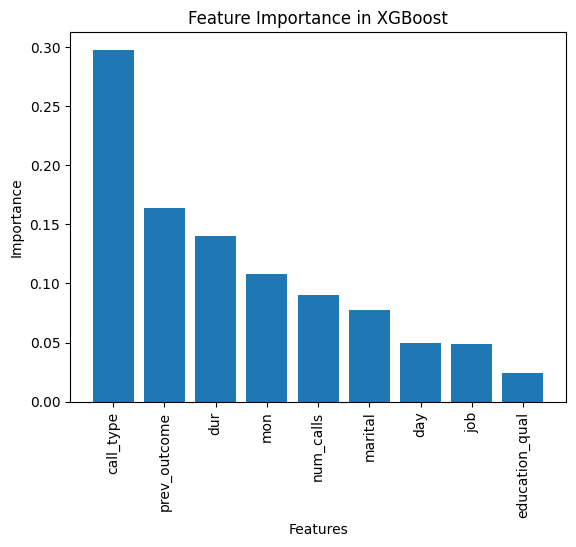

In [230]:
plt.bar(b['column'], b['values'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in XGBoost')
plt.xticks(rotation=90)
plt.show()

# Conclusion:

Based on the Feature Importance given by XG Boost that will predict if a client subscibed to the insurance.     

The client should focused on the top few features of order given below to have them subscribed to the insurance.

1) Call_type    
2) prev_outcome     
3) dur      
4) mon      
5) num_calls
